# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Import today's date in mm/dd/yyyy format
today = date.today()
today = today.strftime("%m/%d/%Y")

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_data = []
print("Beginning Data Retrieval     ")
print("-----------------------------")
record_count = 1
set_count = 1
for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        #city_url = url + "&q=" + city
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    record_count += 1
    city_url = url + "&q=" + city
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | manacapuru
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | vardo
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | souillac
Processing Record 7 of Set 1 | celestun
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | pringsewu
Processing Record 10 of Set 1 | kaeo
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | okha
Processing Record 13 of Set 1 | benguela
Processing Record 14 of Set 1 | diapaga
Processing Record 15 of Set 1 | marawi
Processing Record 16 of Set 1 | chara
Processing Record 17 of Set 1 | saint george
Processing Record 18 of Set 1 | bayonet point
Processing Record 19 of Set 1 | kruisfontein
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | grong
Processing Record 22 of Set 1 | barrow
Processing Record 23 of Set 1 | punta arenas
Pro

Processing Record 40 of Set 4 | axim
Processing Record 41 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 42 of Set 4 | flic en flac
Processing Record 43 of Set 4 | coro
Processing Record 44 of Set 4 | bandarbeyla
Processing Record 45 of Set 4 | port lincoln
Processing Record 46 of Set 4 | plettenberg bay
Processing Record 47 of Set 4 | port macquarie
Processing Record 48 of Set 4 | amderma
City not found. Skipping...
Processing Record 49 of Set 4 | suhbaatar
Processing Record 0 of Set 5 | sawakin
Processing Record 1 of Set 5 | samarai
Processing Record 2 of Set 5 | baruun-urt
Processing Record 3 of Set 5 | summerville
Processing Record 4 of Set 5 | marsaxlokk
Processing Record 5 of Set 5 | pitimbu
Processing Record 6 of Set 5 | coihaique
Processing Record 7 of Set 5 | aguimes
Processing Record 8 of Set 5 | caramay
Processing Record 9 of Set 5 | jurado
Processing Record 10 of Set 5 | ust-nera
Processing Record 11 of Set 5 | maragogi
Processing Record 12 of Set 5 | 

Processing Record 32 of Set 8 | menongue
Processing Record 33 of Set 8 | ginda
Processing Record 34 of Set 8 | verkhoyansk
Processing Record 35 of Set 8 | banda aceh
Processing Record 36 of Set 8 | tripoli
Processing Record 37 of Set 8 | antigonish
Processing Record 38 of Set 8 | san cristobal
Processing Record 39 of Set 8 | sitka
Processing Record 40 of Set 8 | shenjiamen
Processing Record 41 of Set 8 | mundi
Processing Record 42 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 43 of Set 8 | yanam
Processing Record 44 of Set 8 | arona
Processing Record 45 of Set 8 | carballo
Processing Record 46 of Set 8 | turan
Processing Record 47 of Set 8 | caravelas
Processing Record 48 of Set 8 | wenatchee
Processing Record 49 of Set 8 | neyshabur
Processing Record 0 of Set 9 | byron bay
Processing Record 1 of Set 9 | tsybuliv
Processing Record 2 of Set 9 | lolua
City not found. Skipping...
Processing Record 3 of Set 9 | san ignacio
Processing Record 4 of Set 9 | fortuna
Processin

Processing Record 20 of Set 12 | tiznit
Processing Record 21 of Set 12 | bowen
Processing Record 22 of Set 12 | muroto
Processing Record 23 of Set 12 | redmond
Processing Record 24 of Set 12 | onega
Processing Record 25 of Set 12 | iskateley
Processing Record 26 of Set 12 | sawtell
Processing Record 27 of Set 12 | tarbes
Processing Record 28 of Set 12 | ust-bolsheretsk
City not found. Skipping...
Processing Record 29 of Set 12 | lazaro cardenas
Processing Record 30 of Set 12 | monterey
Processing Record 31 of Set 12 | portel
Processing Record 32 of Set 12 | hilton head island
Processing Record 33 of Set 12 | sheridan
Processing Record 34 of Set 12 | lata
Processing Record 35 of Set 12 | liminangcong
City not found. Skipping...
Processing Record 36 of Set 12 | haapu
City not found. Skipping...
Processing Record 37 of Set 12 | touros
Processing Record 38 of Set 12 | boone
Processing Record 39 of Set 12 | wakkanai
Processing Record 40 of Set 12 | andenes
Processing Record 41 of Set 12 | s

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data_pd = pd.DataFrame(city_data)
city_data_pd.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [5]:
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,manacapuru,-3.2997,-60.6206,77.00,94,0,1.14,BR,1610419474
1,hermanus,-34.4187,19.2345,68.00,91,85,3.00,ZA,1610419410
2,cape town,-33.9258,18.4232,70.00,73,20,8.05,ZA,1610419475
3,vardo,70.3705,31.1107,19.92,95,40,24.63,NO,1610419475
4,port elizabeth,-33.9180,25.5701,68.00,94,90,11.50,ZA,1610419475


In [6]:
#Extract
lats = city_data_pd["Lat"]
max_temp =city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]
city_data_pd.to_csv(output_data_file, index_label = "City_ID")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,20.325623,14.634277,48.862784,76.141844,52.226950,7.928706,1.610419e+09
std,32.764883,89.163122,31.099647,18.828696,40.715339,5.986556,5.012860e+01
min,-54.800000,-175.200000,-44.370000,1.000000,0.000000,0.200000,1.610419e+09
25%,-5.977575,-68.200025,29.627500,68.750000,2.000000,3.440000,1.610419e+09
50%,24.517750,19.650000,58.540000,82.000000,68.500000,6.095000,1.610419e+09
75%,47.000950,94.642875,74.702500,89.000000,91.000000,11.052500,1.610420e+09
max,78.218600,178.416700,101.430000,100.000000,100.000000,40.650000,1.610420e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

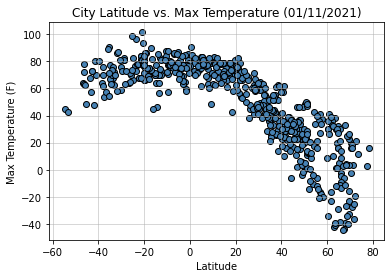

In [8]:
#Create plot
plt.scatter(lats, max_temp, facecolor = "steelblue", edgecolor = "black")
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

#Save the image
plt.savefig("output_data/City Lat vs Max Temp.png")
plt.show()

City Latitude vs. Max Temperature plot shows the maximum temperature recorded at the latitude of the city it was taken from.

## Latitude vs. Humidity Plot

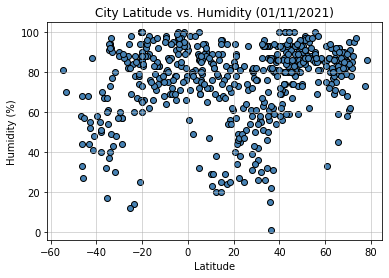

In [9]:
#Create plot
plt.scatter(lats, humidity, facecolor = "steelblue", edgecolor = "black")
plt.title(f"City Latitude vs. Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

#Save the image
plt.savefig("output_data/City Lat vs Humidity.png")

City Latitude vs. Humidity plot shows the humidity percentage recorded at the latitude of the city it was taken from.

## Latitude vs. Cloudiness Plot

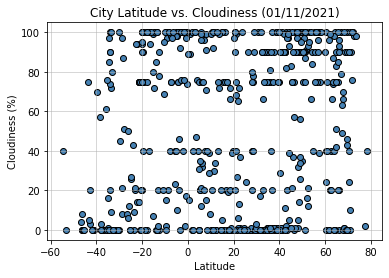

In [10]:
#Create plot
plt.scatter(lats, cloudiness, facecolor = "steelblue", edgecolor = "black")
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

#Save the image
plt.savefig("output_data/City Lat vs Cloudiness.png")

City Latitude vs. Cloudiness plot shows the cloudiness percentage recorded at the latitude of the city it was taken from.

## Latitude vs. Wind Speed Plot

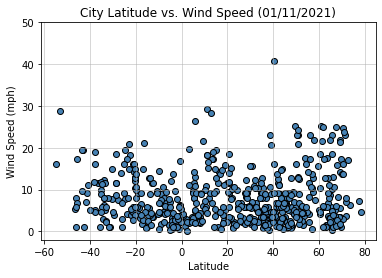

In [11]:
#Create plot
plt.scatter(lats,wind_speed, facecolor = "steelblue", edgecolor = "black")
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,50)
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

#Save the image
plt.savefig("output_data/City Lat vs Wind Speed.png")

City Latitude vs. Wind Speed plot shows the wind speed recorded in miles per hour at the latitude of the city it was taken from.

## Linear Regression

In [24]:
#Create northern and southern hemisphere dataframes
northern_hemisphere = city_data_pd[city_data_pd["Lat"] >= 0]
southern_hemisphere = city_data_pd[city_data_pd["Lat"] < 0]

#Define functions for linear regression and scatter plot
def linear_regression(x,y,title,text_coordinates):
    #print(f"The r-squared is : {round(st.pearsonr(x,y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x = " + str(round(intercept,2))
    plt.scatter(x,y, alpha=0.5, edgecolor='black')
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize = 15, color = "red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue ** 2}")
    #print(f"The line equation is: {line_eq}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7359457081801383


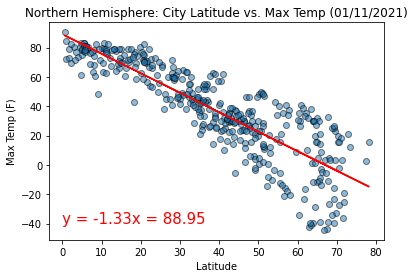

<Figure size 432x288 with 0 Axes>

In [27]:
x = northern_hemisphere["Lat"]
y = northern_hemisphere["Max Temp"]
plt.title(f'Northern Hemisphere: City Latitude vs. Max Temp ({today})')
linear_regression(x,y,'Max Temp (F)',(0,-40))

plt.savefig("output_data/Northern_MaxTempVsLat_Regression.png")

There is a strong negative correlation of higher temperatures at latitudes closer to the equator and cooler temperatures as you increase north. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.09660321936600959


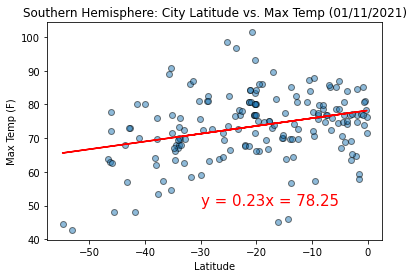

<Figure size 432x288 with 0 Axes>

In [28]:
x = southern_hemisphere["Lat"]
y = southern_hemisphere["Max Temp"]
plt.title(f'Southern Hemisphere: City Latitude vs. Max Temp ({today})')
linear_regression(x,y,'Max Temp (F)',(-30,50))
plt.savefig("output_data/Southern_MaxTemp_Regression.png")

There is a moderate positive correlation of the temperature decreasing the farther south from the equator. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.07786485842212798


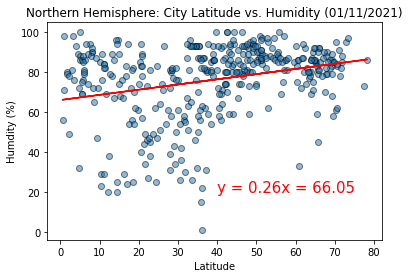

<Figure size 432x288 with 0 Axes>

In [29]:
x = northern_hemisphere["Lat"]
y = northern_hemisphere["Humidity"]
plt.title(f'Northern Hemisphere: City Latitude vs. Humidity ({today})')
linear_regression(x,y,'Humdity (%)',(40,20))
plt.savefig("output_data/Northern_Humidity_Regression.png")

There is a weak positive correlation as humidity increases the farther north you go. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2594341844383178


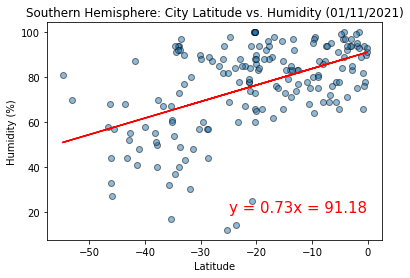

<Figure size 432x288 with 0 Axes>

In [30]:
x = southern_hemisphere["Lat"]
y = southern_hemisphere["Humidity"]
plt.title(f'Southern Hemisphere: City Latitude vs. Humidity ({today})')
linear_regression(x,y,'Humidity (%)',(-25,20))
plt.savefig("output_data/Southern_Humidity_Regression.png")

There is a very weak positive correlation between humidity and the southern hemisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03197280081247975


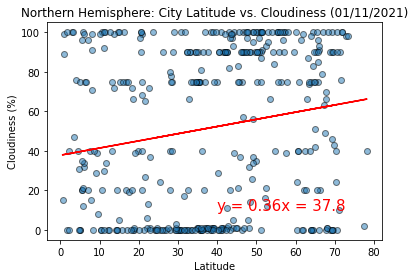

<Figure size 432x288 with 0 Axes>

In [31]:
x = northern_hemisphere["Lat"]
y = northern_hemisphere["Cloudiness"]
plt.title(f'Northern Hemisphere: City Latitude vs. Cloudiness ({today})')
linear_regression(x,y,'Cloudiness (%)',(40,10))
plt.savefig("output_data/Northern_Cloudiness_Regression.png")

There is a positive correlation shown in the plot, however the plot also shows cloudiness at all percentages in most of the latitudes. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.21428989506428836


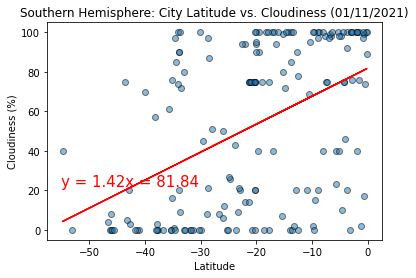

<Figure size 432x288 with 0 Axes>

In [32]:
x = southern_hemisphere["Lat"]
y = southern_hemisphere["Cloudiness"]
plt.title(f'Southern Hemisphere: City Latitude vs. Cloudiness ({today})')
linear_regression(x,y,'Cloudiness (%)',(-55,22))
plt.savefig("output_data/Southern_Cloudiness_Regression.png")

There is a positive correlation shown again, however the graph shows again most cloudiness percentages at most of the latitudes. This is also confirmed with the northern hemisphere and cloudiness. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.005988198133071376


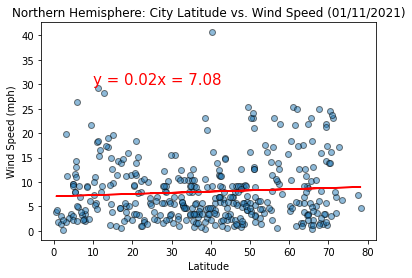

<Figure size 432x288 with 0 Axes>

In [33]:
x = northern_hemisphere["Lat"]
y = northern_hemisphere["Wind Speed"]
plt.title(f'Northern Hemisphere: City Latitude vs. Wind Speed ({today})')
linear_regression(x,y,'Wind Speed (mph)',(10,30))
plt.savefig("output_data/Northern_WindSpeed_Regression.png")

There is a very weak correlation between moving north and wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.11541247184906943


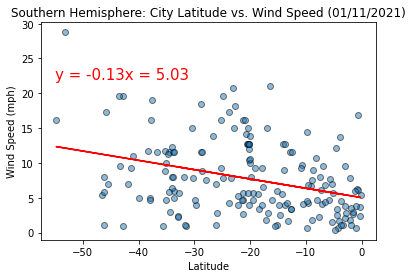

<Figure size 432x288 with 0 Axes>

In [34]:
x = southern_hemisphere["Lat"]
y = southern_hemisphere["Wind Speed"]
plt.title(f'Southern Hemisphere: City Latitude vs. Wind Speed ({today})')
linear_regression(x,y,'Wind Speed (mph)',(-55,22))
plt.savefig("output_data/Southern_WindSpeed_Regression.png")

There is a negative correlation between moving farther south from the equator and wind speed. 